# Live Video Using Webcam

In [14]:
%matplotlib inline

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from IPython import display
#IPython.display.Image(data)

In [16]:
cap = cv.VideoCapture(0)
#Note 0 or -1 is mention to your default webcam
#If you added new camera please mention 1 or etc(2,3,4,....)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Convert to Gray scale image from BGR
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv.imshow("Original_frame", frame)
    cv.imshow("Gray_Image", gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

# Press 'Q' to close

## Playing Video from file

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(r'/home/akshay/Factory_footage/VID_20200115_121220.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Gray_scale',gray)
    cv2.imshow("Origina_Video", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Saving a Video

In [5]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## Saving video in hsv format

In [17]:
# Python program to illustrate 
# saving an operated video 

# organize imports 
import numpy as np 
import cv2 

# This will return video from the first webcam on your computer. 
cap = cv2.VideoCapture(0) 

# Define the codec and create VideoWriter object 
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('output_hsv.avi', fourcc, 20.0, (640, 480)) 

# loop runs if capturing has been initialized. 
while(True): 
    # reads frames from a camera 
    # ret checks return at each frame 
    ret, frame = cap.read() 

    # Converts to HSV color space, OCV reads colors as BGR 
    # frame is converted to hsv 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 

    # output the frame 
    out.write(hsv) 

    # The original input frame is shown in the window 
    cv2.imshow('Original', frame) 

    # The window showing the operated video stream 
    cv2.imshow('frame', hsv) 


    # Wait for 'a' key to stop the program 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

# Close the window / Release webcam 
cap.release() 

# After we release our webcam, we also release the output 
out.release() 

# De-allocate any associated memory usage 
cv2.destroyAllWindows() 


## Create Video from Images

In [12]:
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob(r'/home/akshay/coupon_dataset/coupon_dataset01/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

## Mouse as a paint brush using OpenCV

In [18]:
import cv2
import numpy as np

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        cv2.imwrite("draw.jpg", img)
        break
cv2.destroyAllWindows()

## Drawing example 2

In [19]:
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [20]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

## Trackbar as the Color Palette

In [21]:
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n 1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## Basic Operations on Images

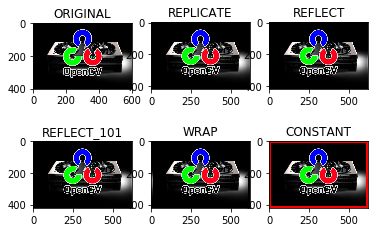

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('OpenCV_01.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

## Arithmetic Operations on Images
### cv2.resize operation two methods check below

In [23]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('OpenCV_01.png')
width = 416
height = 416
dim = (width, height)
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

#cv2.imshow("ml", img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [24]:
img1.shape

(416, 416, 3)

In [25]:
img2 = cv2.resize(img2 , (416,416))

In [26]:
img2.shape

(416, 416, 3)

## Image Blending

In [27]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bitwise Operation

In [28]:
# Load two images
img1 = cv2.imread('messi.jpg')
img2 = cv2.imread('opencv.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

cv2.imshow("mask", mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2.imshow("img1_bg", img1_bg)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
cv2.imshow("img2_fg", img2_fg)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('Result Image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()